In [ ]:
!pip install numpy
!pip install opencv-python

In [ ]:
!pip install opencv-python
!pip install matplotli

In [ ]:
!pip install imutils

In [ ]:


import numpy as np
import cv2
import  imutils


image = cv2.imread('Image_5.jpg')


image = imutils.resize(image, width=500)

cv2.imshow("Original Image", image)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("1 - Grayscale Conversion", gray)

gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2.imshow("2 - Bilateral Filter", gray)

edged = cv2.Canny(gray, 170, 200)
cv2.imshow("3 - Canny Edges", edged)


cnts, hierarchy = cv2.findContours(edged.copy() ,cv2.RETR_LIST ,cv2.CHAIN_APPROX_SIMPLE)


cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 
NumberPlateCnt = None


count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  
            NumberPlateCnt = approx 
            break


cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
cv2.imshow("Final Image With Number Plate Detected", image)

cv2.waitKey(0) 


In [14]:
def split_number_plate(plate):
    state=plate[:2]
    district=plate[2:4]
    series=plate[4:6]
    number=plate[6:]
    print(f"state code:{state}")
    print(f"district code:{district}")
    print(f"series:{series}")
    print(f"number:{number}")

split_number_plate("AP31CM968")



state code:AP
district code:31
series:CM
number:968


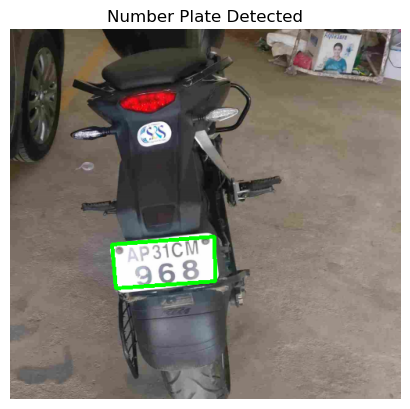

In [28]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

# Load and resize image
image = cv2.imread('Image_5.jpg')
image = imutils.resize(image, width=500)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Bilateral filter
gray = cv2.bilateralFilter(gray, 11, 17, 17)

# Edge detection
edged = cv2.Canny(gray, 170, 200)

# Find contours
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

NumberPlateCnt = None
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        NumberPlateCnt = approx
        break

# Draw detected contour
if NumberPlateCnt is not None:
    cv2.drawContours(image, [NumberPlateCnt], -1, (0, 255, 0), 3)

# Show final image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Number Plate Detected")
plt.axis('off')
plt.show()


In [40]:
!pip install pytesseract

In [46]:
pytesseract.pytesseract.tesseract_cmd=r'c:\Program Files\Tesseract-OCR\tesseract.exe'

🔍 Recognized Number Plate Text: wey


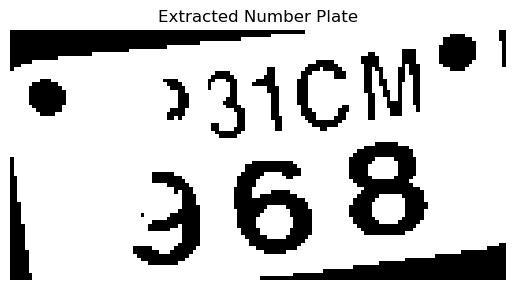

In [52]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import pytesseract 

# Optional: Set Tesseract path if needed (for Windows only)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

if NumberPlateCnt is not None:
    # Mask and extract the number plate region
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [NumberPlateCnt], 0, 255, -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Crop to the bounding rectangle
    x, y, w, h = cv2.boundingRect(NumberPlateCnt)
    plate_crop = gray[y:y+h, x:x+w]

    # Preprocess for better OCR results
    plate_crop = cv2.threshold(plate_crop, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # OCR to read text
    config = '--psm 8 --oem 3'
    text = pytesseract.image_to_string(plate_crop, config=config)
    print("🔍 Recognized Number Plate Text:", text.strip())

    # Show cropped plate
    plt.imshow(plate_crop, cmap='gray')
    plt.title("Extracted Number Plate")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ Number plate not detected.")


In [76]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Optional: Set tesseract path (for Windows users)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Assume 'image' is the input and 'NumberPlateCnt' is already found
if NumberPlateCnt is not None:
    # Create a mask for the plate
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [NumberPlateCnt], 0, 255, -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Crop to bounding rectangle
    x, y, w, h = cv2.boundingRect(NumberPlateCnt)
    plate_crop = gray[y:y+h, x:x+w]

    # Improve image quality for OCR
    plate_crop = cv2.resize(plate_crop, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    plate_crop = cv2.bilateralFilter(plate_crop, 11, 17, 17)
    _, plate_crop = cv2.threshold(plate_crop, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR to extract only digits
    config = '--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789'
    text = pytesseract.image_to_string(plate_crop, config=config)
    numbers_only = ''.join(filter(str.isdigit, text))

    print("🔢 Extracted Numbers:", numbers_only)

    # Show image
    plt.imshow(plate_crop, cmap='gray')
    plt.title("Processed Plate for Digits")
    plt.axis('off')
    plt.show()

else:
    print("⚠️ Number plate not detected.")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


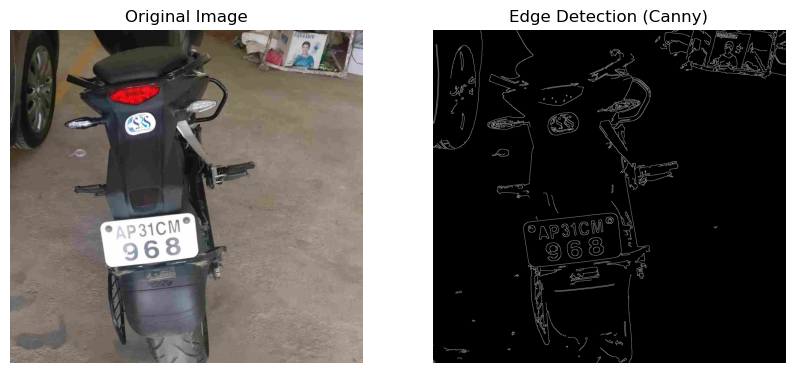

In [56]:
import cv2
import matplotlib.pyplot as plt

# Load and convert to grayscale
image = cv2.imread('Image_5.jpg')  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Show the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

plt.show()


🔠 Recognized Text: ' om ) : a a, €
’ fi f _ ae ¢ [an _>
- 7 =
. . a '
vel .
mM - af
| \>
: 3
ry
oF aA. — a a! ee ‘s
~ ; —_- a ’ ~ by
oy . - - : .
; _ . - : ; , ° a


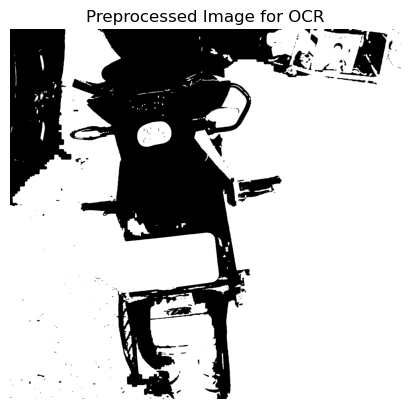

In [60]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Optional: Set the path to tesseract executable (required on Windows)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load image
image = cv2.imread('Image_5.jpg')  # Replace with your file path

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply preprocessing for better OCR
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  # Scale up
gray = cv2.bilateralFilter(gray, 11, 17, 17)  # Remove noise
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Run OCR
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(thresh, config=custom_config)

# Display results
print("🔠 Recognized Text:", text.strip())

# Show the processed image
plt.imshow(thresh, cmap='gray')
plt.title("Preprocessed Image for OCR")
plt.axis('off')
plt.show()


In [66]:
smoothed = cv2.GaussianBlur(image, (5, 5), 0)


In [68]:
smoothed = cv2.medianBlur(image, 5)


In [72]:
smoothed = cv2.bilateralFilter(image, 11, 17, 17)


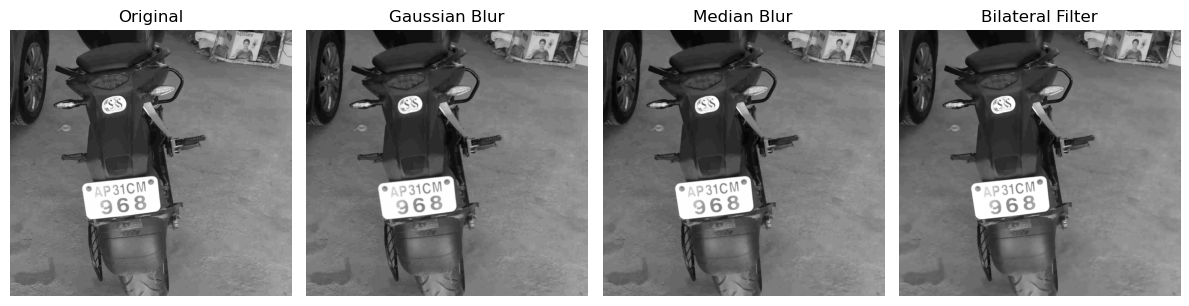

In [74]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply different smoothing filters
gaussian = cv2.GaussianBlur(image, (5, 5), 0)
median = cv2.medianBlur(image, 5)
bilateral = cv2.bilateralFilter(image, 11, 17, 17)

# Display all results
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(median, cmap='gray')
plt.title("Median Blur")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(bilateral, cmap='gray')
plt.title("Bilateral Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


License plate detected.


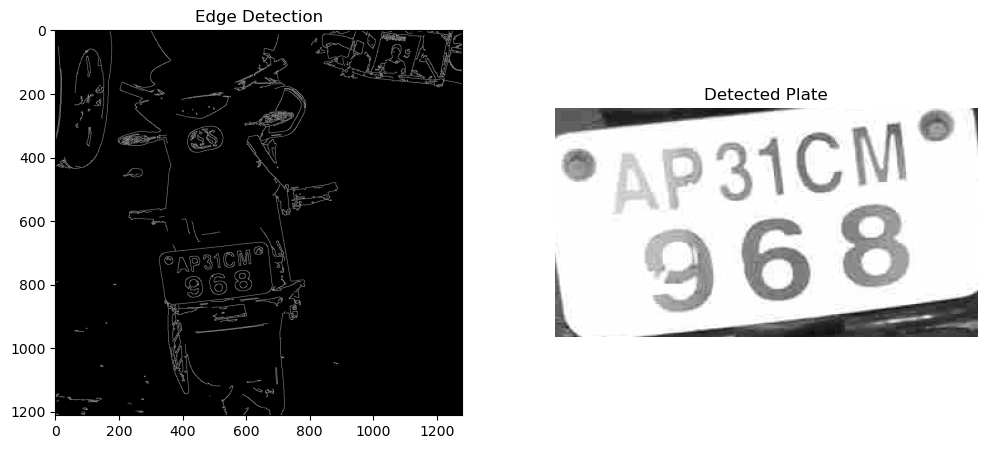

In [2]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('Image_5.jpg')  # Replace with your image filename
if image is None:
    raise FileNotFoundError("Image not found.")

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Noise reduction
blurred = cv2.bilateralFilter(gray, 11, 17, 17)

# Step 4: Edge detection
edged = cv2.Canny(blurred, 30, 200)

# Step 5: Find contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Step 6: Search for a rectangular contour (number plate)
plate_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.018 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:
        plate_contour = approx
        break

# Step 7: Draw and crop plate
if plate_contour is not None:
    cv2.drawContours(image, [plate_contour], -1, (0, 255, 0), 3)
    x, y, w, h = cv2.boundingRect(plate_contour)
    plate = gray[y:y + h, x:x + w]
    print("License plate detected.")
else:
    plate = None
    print("License plate not found.")

# Step 8: Show images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(edged, cmap='gray')
plt.title("Edge Detection")

plt.subplot(1, 2, 2)
if plate is not None:
    plt.imshow(plate, cmap='gray')
    plt.title("Detected Plate")
else:
    plt.imshow(gray, cmap='gray')
    plt.title("Fallback: Grayscale Image")
plt.axis('off')
plt.show()


In [101]:
import cv2
import pytesseract
import numpy as np

# Optional: Path to Tesseract executable (Windows only)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load image
image = cv2.imread("Image_5.jpg")  # Replace with your image path

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply noise reduction and thresholding
gray = cv2.bilateralFilter(gray, 11, 17, 17)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# OCR configuration to extract both numbers and letters
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(thresh, config=custom_config)

# Clean the text
plate_text = text.strip()
print("🔠 Extracted Plate Text:", plate_text)


🔠 Extracted Plate Text: " ie Te «“? A
we? i
Ly . .
\!
- i, |


In [103]:
pip install opencv-python pytesseract


Note: you may need to restart the kernel to use updated packages.


In [105]:
import cv2
import pytesseract

# If you're on Windows, specify the path to tesseract.exe
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image
image = cv2.imread('Image_5.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply some preprocessing (thresholding or blurring if needed)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)

# Run OCR on the image
text = pytesseract.image_to_string(gray, config='--psm 8')  # PSM 8 works well for license plates

print("Detected License Plate Text:", text.strip())


Detected License Plate Text: 7


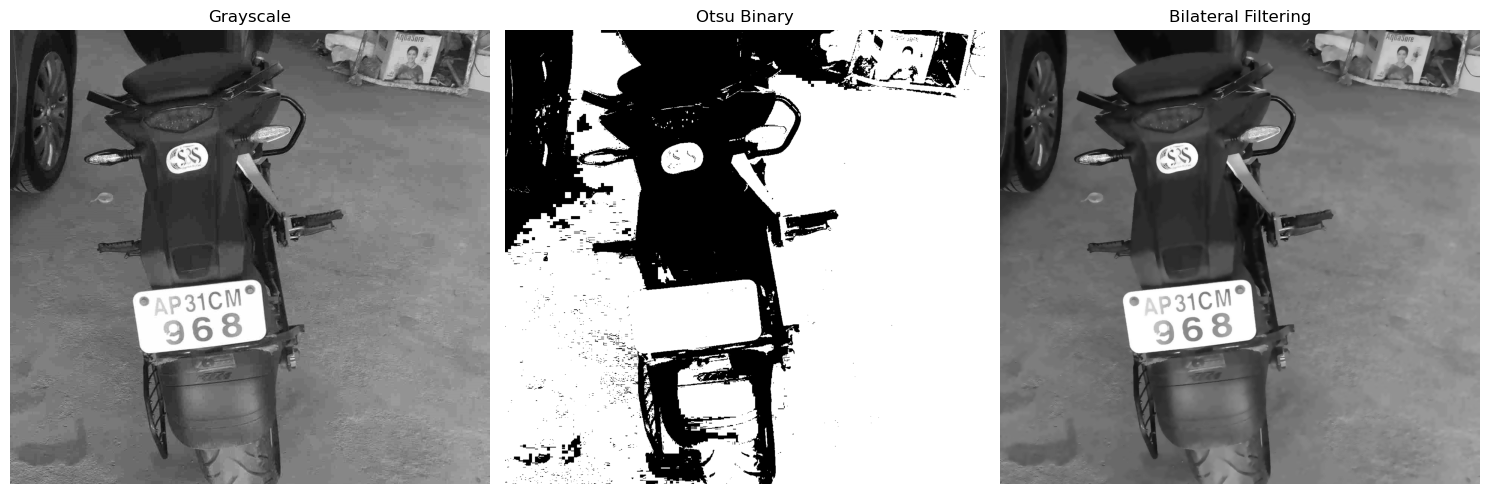


OCR Results:
Original Grayscale: 
Otsu Binary: 
Bilateral Filtered: S SS
W
VN


In [145]:
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import shutil
import os

# Check and set tesseract path if needed (Windows)
if not shutil.which("tesseract"):
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def recognize_text(image):
    """
    Use OCR to recognize text in the image.
    """
    if len(image.shape) == 2:
        pil_image = Image.fromarray(image)
    else:
        pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(pil_image, config=config)
    return text.strip()

def display_images(images, titles):
    """
    Display images using matplotlib.
    """
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def apply_ocr_to_various_preprocessed_images(image_path):
    """
    Apply OCR to multiple preprocessing versions of a license plate image.
    """
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found.")
        return {}

    original = cv2.imread(image_path)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    otsu_binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    bilateral = cv2.bilateralFilter(gray, 11, 17, 17)

    results = {
        "Original Grayscale": recognize_text(gray),
        "Otsu Binary": recognize_text(otsu_binary),
        "Bilateral Filtered": recognize_text(bilateral)
    }

    display_images([gray, otsu_binary, bilateral],
                   ["Grayscale", "Otsu Binary", "Bilateral Filtering"])
    return results

if __name__ == "__main__":
    image_path = "Image_5.jpg"

    ocr_results = apply_ocr_to_various_preprocessed_images(image_path)

    print("\nOCR Results:")
    for method, text in ocr_results.items():
        print(f"{method}: {text}")


In [147]:
pip install opencv-python pytesseract pillow matplotlib


Note: you may need to restart the kernel to use updated packages.


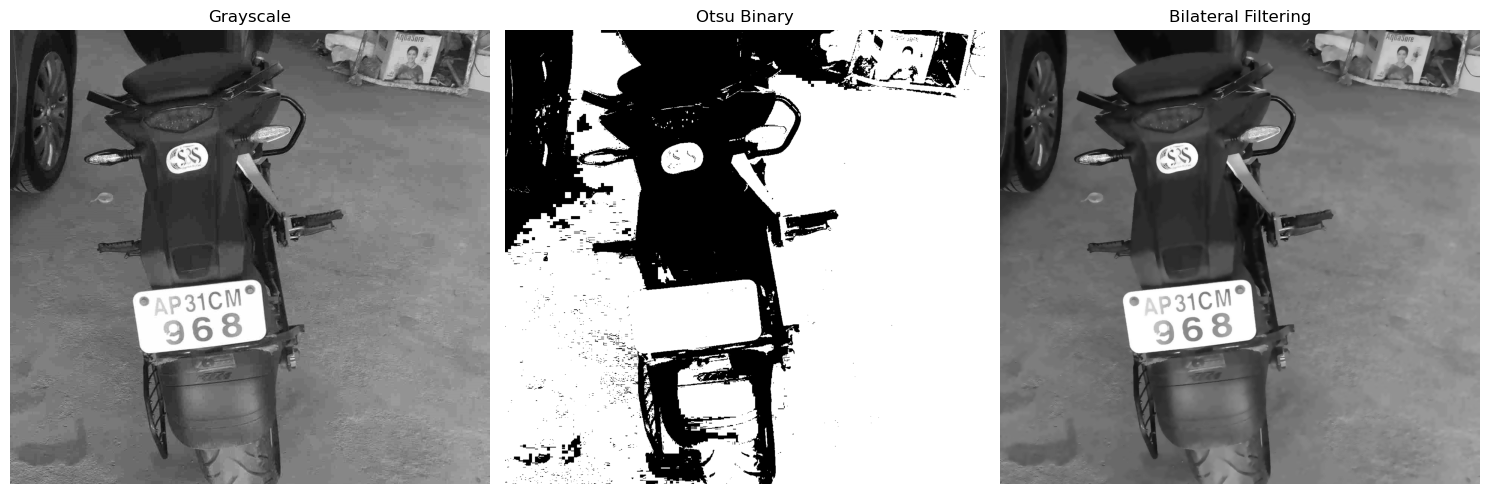


OCR Results:
Original Grayscale: 
Otsu Binary: 
Bilateral Filtered: S SS
W
VN


In [149]:
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import shutil
import os

# Optional: Set Tesseract path if it's not in PATH
if not shutil.which("tesseract"):
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def recognize_text(image):
    """
    Recognize text from an image using pytesseract OCR.
    """
    # Convert to PIL Image as required by pytesseract
    if len(image.shape) == 2:  # Grayscale
        pil_image = Image.fromarray(image)
    else:  # Color
        pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Configure Tesseract
    config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(pil_image, config=config)
    return text.strip()

def display_images(images, titles):
    """
    Display multiple images with titles using matplotlib.
    """
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def apply_ocr_to_various_preprocessed_images(image_path):
    """
    Apply OCR to various preprocessed versions of the license plate image.
    """
    if not os.path.exists(image_path):
        print(f"Error: Image file '{image_path}' not found.")
        return {}

    # Load and preprocess
    original = cv2.imread(image_path)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    otsu_binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    bilateral = cv2.bilateralFilter(gray, 11, 17, 17)

    # OCR on each version
    results = {
        "Original Grayscale": recognize_text(gray),
        "Otsu Binary": recognize_text(otsu_binary),
        "Bilateral Filtered": recognize_text(bilateral)
    }

    # Display images
    display_images([gray, otsu_binary, bilateral],
                   ["Grayscale", "Otsu Binary", "Bilateral Filtering"])

    return results

if __name__ == "__main__":
    image_path = "Image_5.jpg"  # Make sure this file exists

    ocr_results = apply_ocr_to_various_preprocessed_images(image_path)

    print("\nOCR Results:")
    for method, text in ocr_results.items():
        print(f"{method}: {text}")
